In [1]:
#Import deps 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

.... Some Introductory Text 

In [2]:
# Import Data 
all_wine_raw_df = pd.read_csv('./Wine_data_both.csv') 
red_wine_df = pd.read_csv('./Wine_data_red.csv')
white_wine_df = pd.read_csv('./Wine_data_white.csv')

### Preprocess data

### <font color='blue'>All Wine Raw Data Frame Exploratory analysis<font>

In [3]:
all_wine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
all_wine_raw_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Wine                    0
dtype: int64

In [5]:
all_wine_raw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


#### Casting as category type

In [6]:
all_wine_raw_df['quality'] = all_wine_raw_df['quality'].astype('category')
all_wine_raw_df['Wine'] = all_wine_raw_df['Wine'].astype('category')

In [7]:
all_wine_raw_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### Feature distribution raw Viz

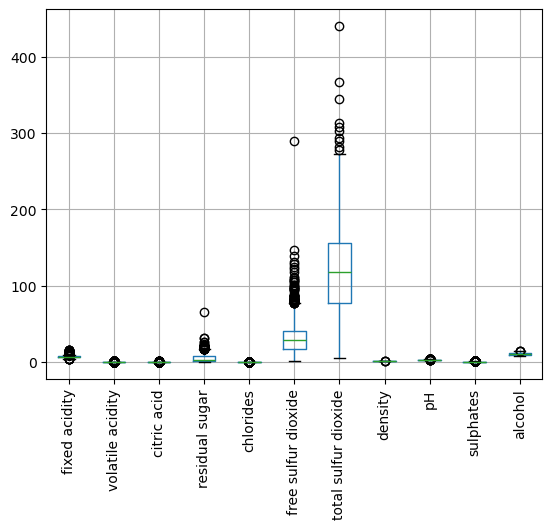

In [8]:
all_wine_raw_df.boxplot()
plt.xticks(rotation=90)
plt.show()

**Note:**
        The scale for 'total sulfur dioxide' and 'free sulfur dioxided' measurments are significantly bigger than the rest<br>
        of the features
    

#### Feature distribution Scaled Viz

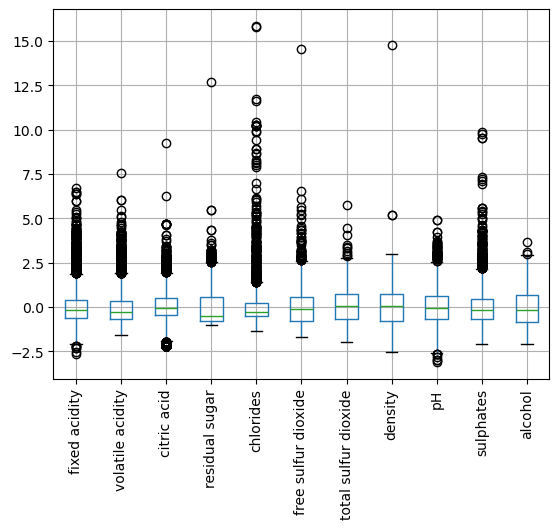

In [9]:
cols = all_wine_raw_df.drop(columns=['Wine','quality']).columns

scaler = StandardScaler()
X = all_wine_raw_df.drop(columns = ['Wine','quality'])
X = scaler.fit_transform(X)

X_df = pd.DataFrame(X,columns = cols)
X_df.boxplot()
plt.xticks(rotation=90)
plt.show()

#### Correlation

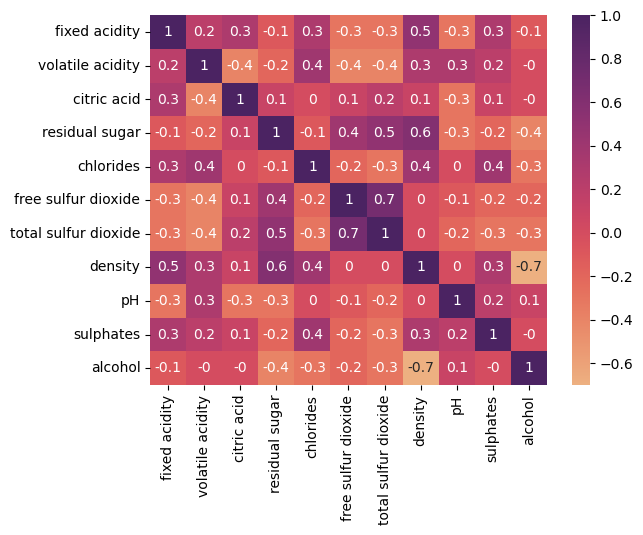

In [10]:
X_corr = X_df.corr().round(1)
sns.heatmap(X_corr,annot=True,cmap='flare') 
plt.show()

**Note:**
            free sulfur dioxide and total sulfur dioxide have a significant positive correlation<br>
            alcohol and density have a significant negative correlation.

#### Target : Wine type

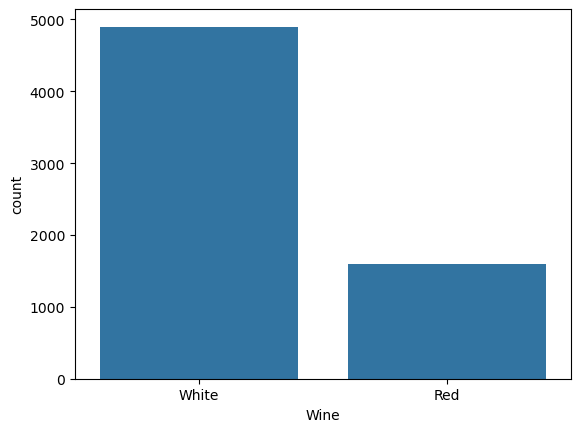

In [11]:
sns.countplot(x=all_wine_raw_df['Wine'])
plt.show()

In [12]:
all_wine_raw_df['Wine'].value_counts()

Wine
White    4898
Red      1599
Name: count, dtype: int64

**Note:** 
    The target variable is heavily inbalanced 3 'White' to 1 'Red'

#### Target: Quality

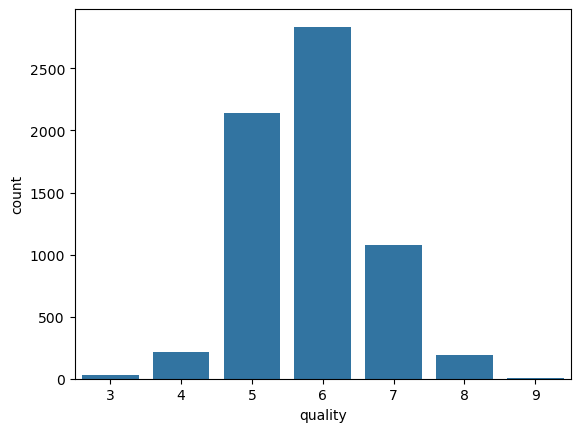

In [13]:
sns.countplot(x=all_wine_raw_df['quality'])
sns.countplot(x=all_wine_raw_df['Wine'])
plt.show()

In [14]:
all_wine_raw_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

#### Quality count by wine type

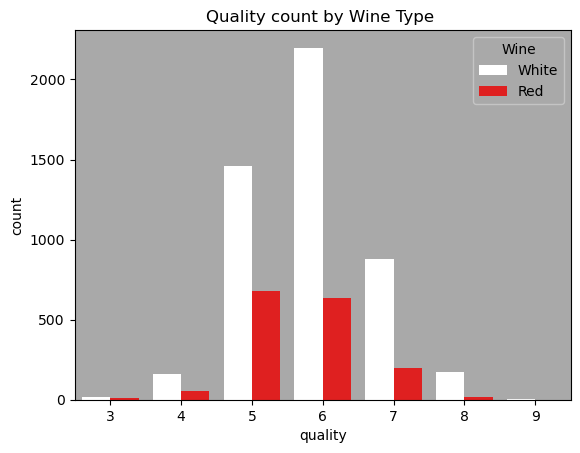

In [29]:
sns.set_style(rc = {'axes.facecolor': 'darkgrey'})
sns.countplot(x=all_wine_raw_df['quality'],hue=all_wine_raw_df['Wine'], palette=['white',"red"]).set(title='Quality count by Wine Type ')
plt.show()

In [15]:
# Build Model 

In [16]:
# Evaluate and Optimize Model

... Text interpreting and describing results 

In [17]:
# Export Results